<a href="https://colab.research.google.com/github/BitnooriLee/Into-Data-Science-and-AI/blob/main/DAT405_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAT405/DIT406 Introduction to Data Science and AI

# Assignment 3: Clustering
**Group 28 Bitnoori Lee Emil Åkesson**

Work hours : Bitnoori Lee (5hours) Emil Åkesson (5hours)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')
root = '/content/gdrive/My Drive/DAT405/'
data_all = pd.read_csv(root+"data_all.csv")
data_500 = pd.read_csv(root+"data_500.csv")
data_200 = pd.read_csv(root+"data_200.csv")

#check residual name
data_all["residue name"]


Mounted at /content/gdrive


0        LYS
1        PRO
2        LYS
3        LEU
4        LEU
        ... 
29364    GLY
29365    GLN
29366    ILE
29367    ASN
29368    LYS
Name: residue name, Length: 29369, dtype: object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D



# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT405/'
data_all = pd.read_csv(root+"data_all.csv")
data_500 = pd.read_csv(root+"data_500.csv")
data_200 = pd.read_csv(root+"data_200.csv")

#check residual name
data_all["residue name"]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


0        LYS
1        PRO
2        LYS
3        LEU
4        LEU
        ... 
29364    GLY
29365    GLN
29366    ILE
29367    ASN
29368    LYS
Name: residue name, Length: 29369, dtype: object

# Task 1
# Plotting the whole data set

In [ ]:
import plotly.express as px
df = data_all
fig = px.scatter_3d(df, x='phi', y='psi', z='position',
              color='chain')
fig.show()


The data set is too large for us to be able to recognize any clear patterns. 

Conclusions:


* At positions greater than 500, there seem to be only blue and red chains (A & B). 





* The data seems to form three regognizable clusters taking the form of pillars.

* For some of the phi and psi combinations the density along the position axis seems to decrease. There's only one pillar that seems to be as dense along the whole axis.



---



# Plotting 500 data points

In [ ]:
df = data_500
fig = px.scatter_3d(df, x='phi', y='psi', z='position',
              color='chain')
fig.show()

The clusters are more recognizeable with this data set.

# Plotting 200 data points

In [ ]:
df = data_200
fig = px.scatter_3d(df, x='phi', y='psi', z='position',
              color='residue name')
fig.show()

To switch things up we decided to plot the residue name as the color of each data point. We can see that one small cluster contains mostly of one kind of residue while the others are seemingly more random. Let's see this residue in the big data set..

#Plotting color against "residue name"

In [ ]:
df = data_all
fig = px.scatter_3d(df, x='phi', y='psi', z='position',
              color='residue name')
fig.show()

It seems that a specific phi and psi combination makes the data point more likely to have a certain residue. The green cluster shows that. The green cluster also shows how the density decreases as the position increases. 

# Histogram in 2d

In [ ]:
df = data_all
fig = px.density_heatmap(df, x="phi", y="psi")
fig.show()

# How can the visualization be improved?

We believe it's hard to find a better way to visualize the scatter plots. surpassing 4 dimensions seems to be hard. Best way to get somewhere is to come up with a theory and then compare different plots until something intereseting is to be seen. 

With the histograms we could also visualize the data with different data columns such as "phi vs position", "phi vs chain" and so on. Antoher way to improve is to try with different intervals(bins) in the graph.

# Task 2
Switching to 2d graph representation for clarity

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
tt = data_all
tt = tt.drop(tt.columns[[0, 1, 2]], axis=1)
print(tt)
train, test = train_test_split(tt, test_size=0.3)
train1 = train.to_numpy().tolist() 
test1 = test.to_numpy().tolist()

              phi         psi
0     -149.312855  142.657714
1      -44.283210  136.002076
2     -119.972621 -168.705263
3     -135.317212  137.143523
4     -104.851467   95.928520
...           ...         ...
29364 -147.749557  155.223562
29365 -117.428541  133.019506
29366 -113.586448  112.091970
29367 -100.668779  -12.102821
29368 -169.951240   94.233680

[29369 rows x 2 columns]


# Determining the optimal value of K in K-Means Clustering, using the elbow method


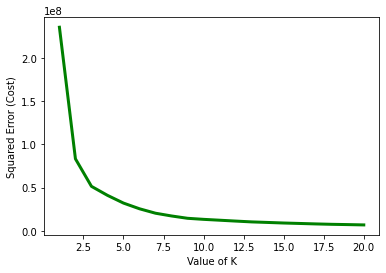

In [ ]:
#Using the elbow method
cost =[]
for i in range(1, 21):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(train)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 21), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

Motivation for K: 

The graph shows a declining inclination degree around K = 4. Thereforecan the optimal K-value for the clusters according to the elbow method is somewhere between 4-8.

- "Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data." /Wikipedia

# K = 8

-7448824.363514433


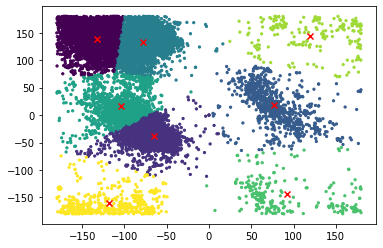

In [ ]:


kmeans = KMeans(n_clusters=8, random_state=0)
fitted = kmeans.fit(train)
plt.scatter(train['phi'], train['psi'],s=5,c=fitted.labels_.astype(float))
plt.scatter(fitted.cluster_centers_[:, 0], fitted.cluster_centers_[:, 1], c='red', marker='x')
pred = kmeans.predict(test)
score = kmeans.score(test)
print(score)


# K = 4

-18227590.119823236


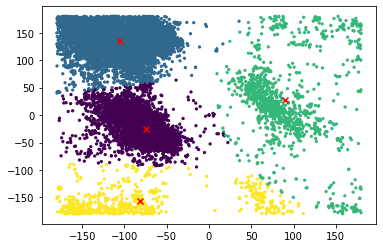

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
fitted = kmeans.fit(train)
plt.scatter(train['phi'], train['psi'],s=5,c=fitted.labels_.astype(float))
plt.scatter(fitted.cluster_centers_[:, 0], fitted.cluster_centers_[:, 1], c='red', marker='x')
pred = kmeans.predict(test)
score = kmeans.score(test)
print(score)

# Is the clusters found reasonable?

Both K = 4 and K = 8 seems reasonable. There's some points accumulating at the furthers top-right and bottom-left. These points are designated when K = 8 which could be sustainable for future calculations. 

For K = 4 there's a more logical solution for the two largest clusters. They are not split into two clusters as when K = 8. Though the yellow cluster split is rather strange.

It's hard to know a definitive answer. The perfect cluster distibrution would be 6 but when we set K = 6 the cluster at the top-right is not assigned, instead the largest cluster at the top-left is split, which does not seem logical at this point.

# K = 6

-11041900.658940185


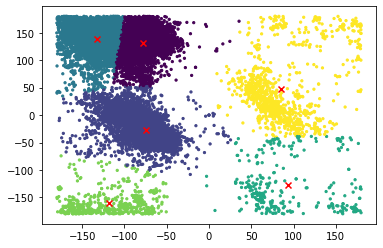

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
fitted = kmeans.fit(train)
plt.scatter(train['phi'], train['psi'],s=5,c=fitted.labels_.astype(float))
plt.scatter(fitted.cluster_centers_[:, 0], fitted.cluster_centers_[:, 1], c='red', marker='x')
pred = kmeans.predict(test)
score = kmeans.score(test)
print(score)

# 2c
# Changing degrees to radians

In [ ]:

import math
tt['phi'] = tt['phi'].apply(math.radians)
tt['psi'] = tt['psi'].apply(math.radians)
train, test = train_test_split(tt, test_size=0.3)
train1 = train.to_numpy().tolist() 
test1 = test.to_numpy().tolist()

In [ ]:
tt

phi       psi
0     -2.606001  2.489847
1     -0.772888  2.373684
2     -2.093917 -2.944462
3     -2.361731  2.393606
4     -1.830003  1.674269
...         ...       ...
29364 -2.578716  2.709162
29365 -2.049515  2.321628
29366 -1.982458  1.956374
29367 -1.757002 -0.211234
29368 -2.966209  1.644688

[29369 rows x 2 columns]

-3351.4790221280637


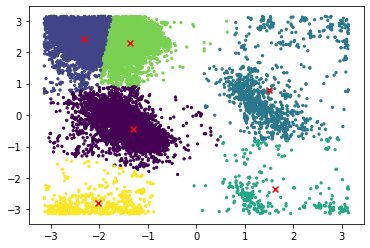

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
fitted = kmeans.fit(train)
plt.scatter(train['phi'], train['psi'],s=5,c=fitted.labels_.astype(float))
plt.scatter(fitted.cluster_centers_[:, 0], fitted.cluster_centers_[:, 1], c='red', marker='x')
pred = kmeans.predict(test)
score = kmeans.score(test)
print(score)

#Task 3.

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#Convert x and y to 2D array 
arr = []
for i in range(len(x)): 
 arr.append([x[i], y[i]])

arr = np.array(arr)

arr_all = []

for i in range(len(x_all)): 
 arr_all.append([x_all[i], y_all[i]])

arr_all = np.array(arr_all)


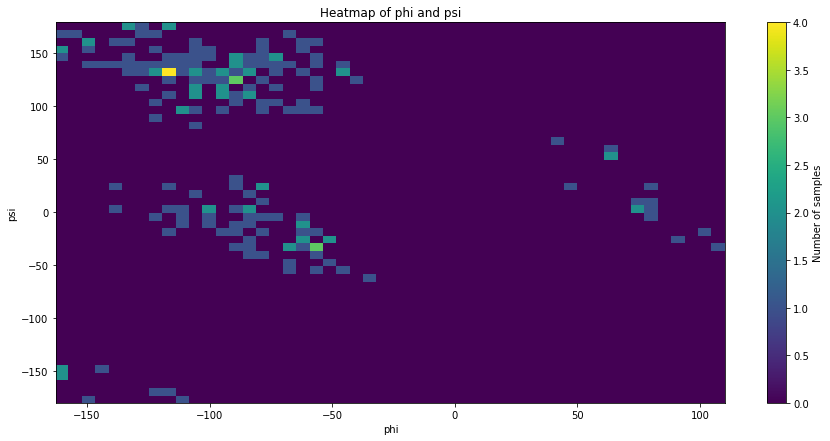

In [ ]:
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(arr[:,0], arr[:,1], bins=50, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.
plt.xlabel("phi")
plt.ylabel("psi")
plt.title('Heatmap of phi and psi')

# Show the plot.
plt.show()

In [ ]:
arr = StandardScaler().fit_transform(arr)
arr_all = StandardScaler().fit_transform(arr_all)
arr_all

array([[-1.17772057,  0.86048545],
       [ 0.66984935,  0.78744133],
       [-0.66159835, -2.556653  ],
       ...,
       [-0.54925958,  0.52503331],
       [-0.32202567, -0.83797651],
       [-1.54076911,  0.3290426 ]])

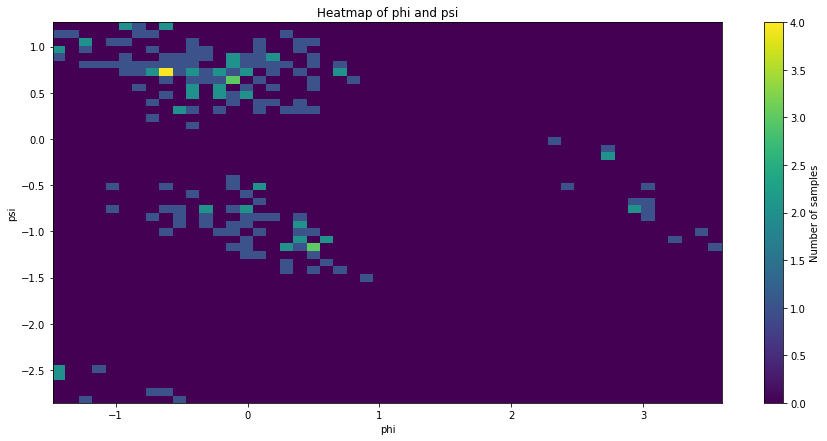

In [ ]:
# Set size of the figure
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(arr[:,0], arr[:,1], bins=50, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.xlabel("phi")
plt.ylabel("psi")
plt.title('Heatmap of phi and psi')

# Show the plot.
plt.show()

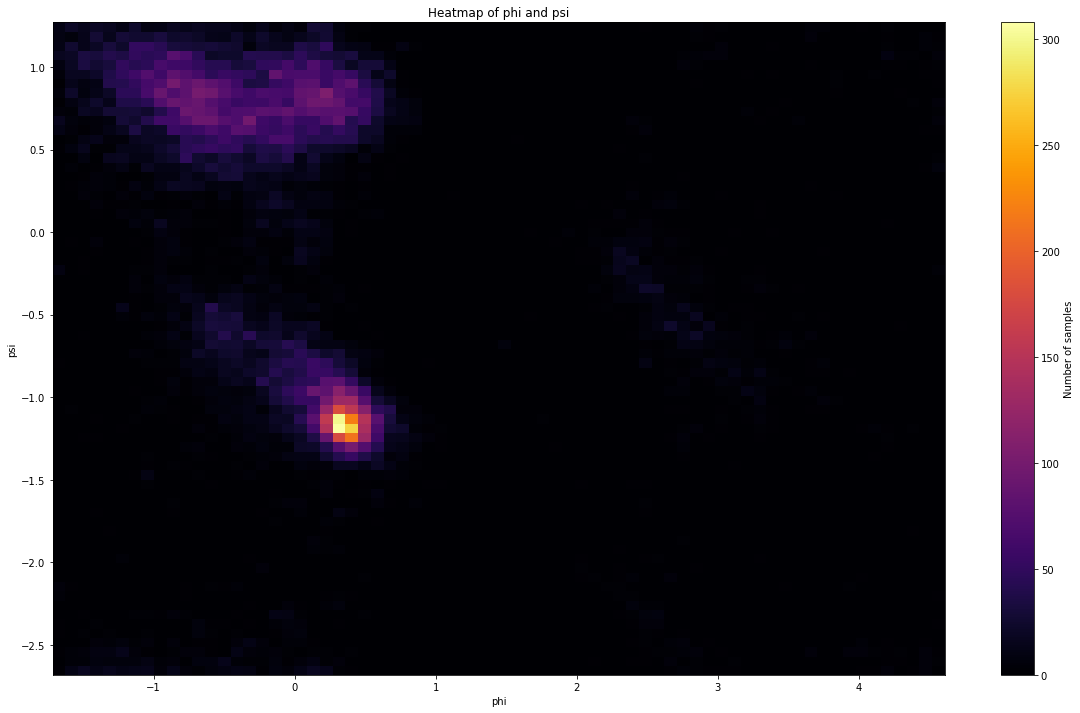

In [ ]:
# Set size of the figure
plt.figure(figsize=(20, 12))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(arr_all[:,0], arr_all[:,1], bins=70, cmap='inferno')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.xlabel("phi")
plt.ylabel("psi")
plt.title('Heatmap of phi and psi')

# Show the plot.
plt.show()

#A

#Using the smaller dataset to find some smaller range for the parameters nr_samples and eps 

In [ ]:
# Compute DBSCAN w eps=0.4, min_samples=20
db = DBSCAN(eps=0.4, min_samples=20).fit(arr) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


DBSCAN(eps=0.4, min_samples=20)
Estimated number of clusters: 2
Estimated number of noise points: 30


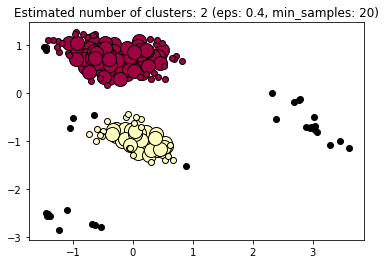

In [ ]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.1, min_samples=3)
Estimated number of clusters: 21
Estimated number of noise points: 68


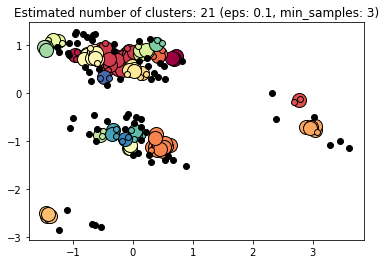

In [ ]:

db = DBSCAN(eps=0.1, min_samples=3).fit(arr) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.2, min_samples=3)
Estimated number of clusters: 7
Estimated number of noise points: 13


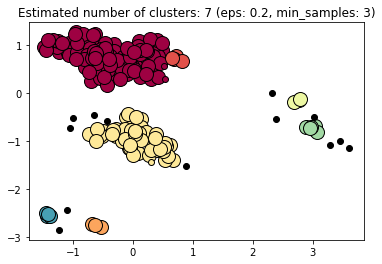

In [ ]:

db = DBSCAN(eps=0.2, min_samples=3).fit(arr) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.2, min_samples=6)
Estimated number of clusters: 4
Estimated number of noise points: 32


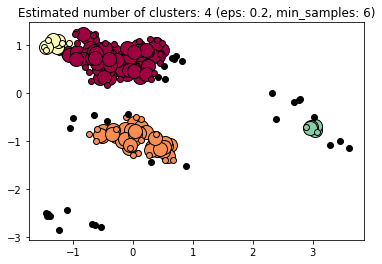

In [ ]:

db = DBSCAN(eps=0.2, min_samples=6).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.2, min_samples=4)
Estimated number of clusters: 5
Estimated number of noise points: 19


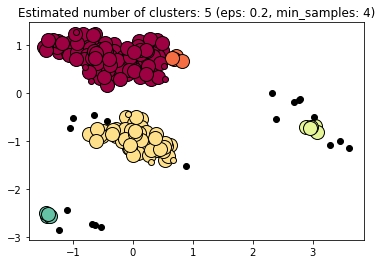

In [ ]:
db = DBSCAN(eps=0.2, min_samples=4).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

[ 0  0 -1  0  0  0  0  1  0  2 -1  0  0  0  0  0  0  1  1  2  0  0 -1  0
  0  1  0  1  1  0  1 -1  1  0  0  0  0  0  0  1 -1  1  1  0  0  0  0  0
  0  1  1  1  2  0  0  0 -1  0  1  1  2  0  0  0  0  0  1  0  0 -1  1  1
  1  0  0  0  0  0  0  0  1  1 -1  0  0  0  0  0  0  1  1  1  1  1  1 -1
  0  0  0  0  0  0  1  1 -1  0  0  0  0  1  1  1  0  0  0 -1  0  1  1  1
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  2 -1  0  0  0  0  0  0
  1  1  2  0  0 -1  0  0  1  0  1  1  0  1  1  1  0  0  0  0  0  0  1 -1
  1  1  0  0  0  0  0  0  1  1  1  2  0  0  0 -1  0  1  1  2  0  0  0  0
  0  1  0  0 -1  1  1  1]
DBSCAN(eps=0.4, min_samples=8)
Estimated number of clusters: 3
Estimated number of noise points: 17


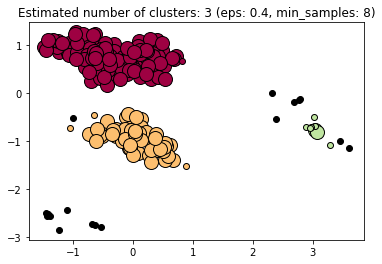

In [ ]:
# Compute DBSCAN  w eps=0.4, min_samples=7
db = DBSCAN(eps=0.4, min_samples=8).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(labels)
print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.4, min_samples=4)
Estimated number of clusters: 4
Estimated number of noise points: 8


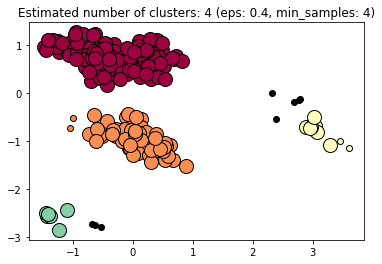

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=4).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.4, min_samples=3)
Estimated number of clusters: 6
Estimated number of noise points: 2


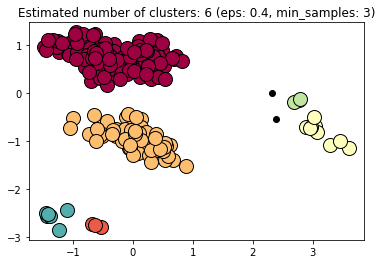

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=3).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.3, min_samples=10)
Estimated number of clusters: 2
Estimated number of noise points: 28


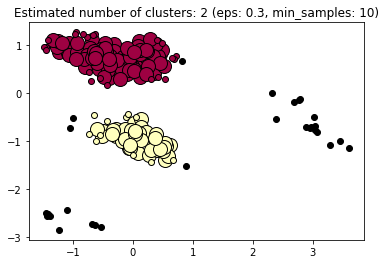

In [ ]:
# Compute DBSCAN  w eps=0.3, min_samples=10
db = DBSCAN(eps=0.3, min_samples=10).fit(arr) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.3)
Estimated number of clusters: 3
Estimated number of noise points: 19


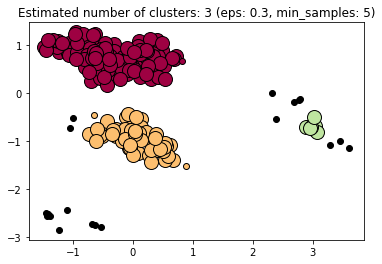

In [ ]:
# Compute DBSCAN  w eps=0.3, min_samples= 5
db = DBSCAN(eps=0.3, min_samples=5).fit(arr) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.3, min_samples=4)
Estimated number of clusters: 4
Estimated number of noise points: 15


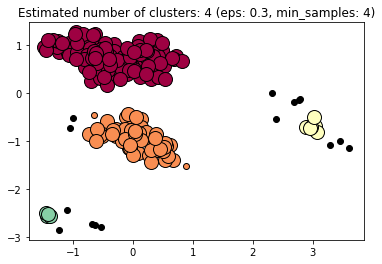

In [ ]:
# Compute DBSCAN  w eps=0.3, min_samples= 4
db = DBSCAN(eps=0.3, min_samples=4).fit(arr) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)




print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

#Applied experimentally find the parameters nr_samples and eps and tuning

DBSCAN(eps=0.4, min_samples=40)
Estimated number of clusters: 3
Estimated number of noise points: 54


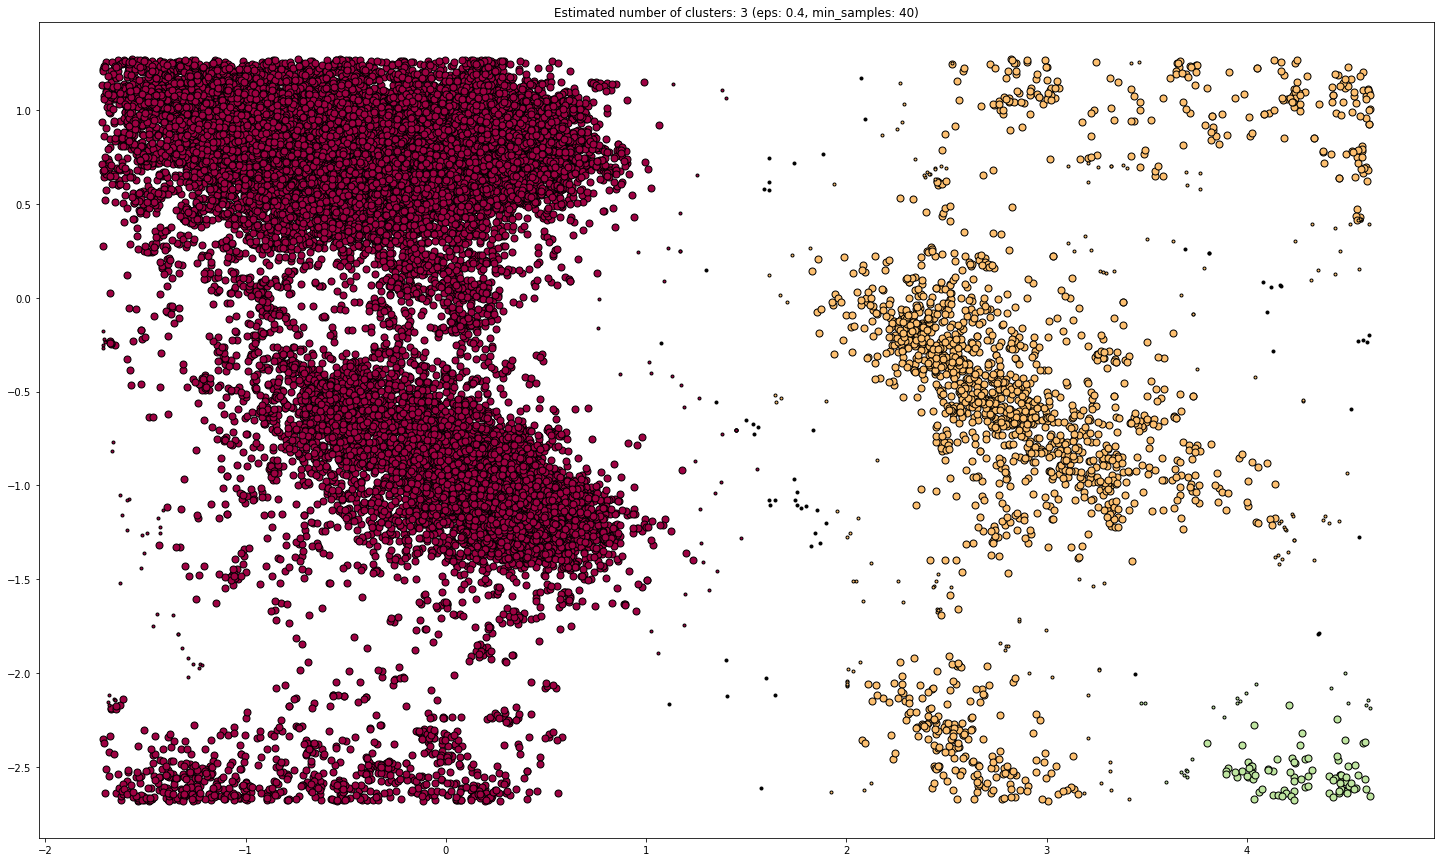

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=40).fit(arr_all) # 0.3, 10 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

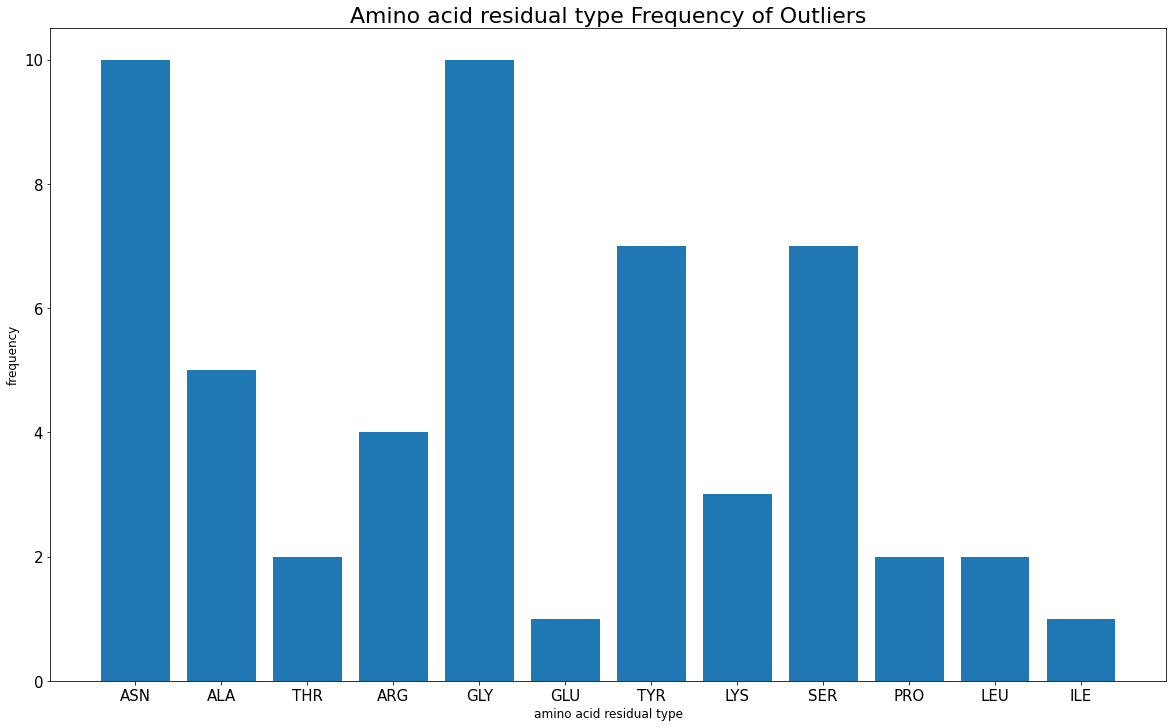

In [ ]:
# Count outlier, protein when eps=0.4, min_samples=40
residue_name = []

for i in range(len(arr_all)):
  if labels[i] == -1 :
   residue_name.append(data_all["residue name"][i])

from collections import Counter
residue_count = Counter(residue_name)

# Plot bar chart from dictionary
names = list(residue_count .keys())
values = list(residue_count .values())


plt.figure(figsize=(20, 12))
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel("amino acid residual type",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.title('Amino acid residual type Frequency of Outliers', fontsize=22)
plt.bar(range(len(residue_count)), values, tick_label=names)
plt.show()


DBSCAN(eps=0.4, min_samples=25)
Estimated number of clusters: 2
Estimated number of noise points: 8


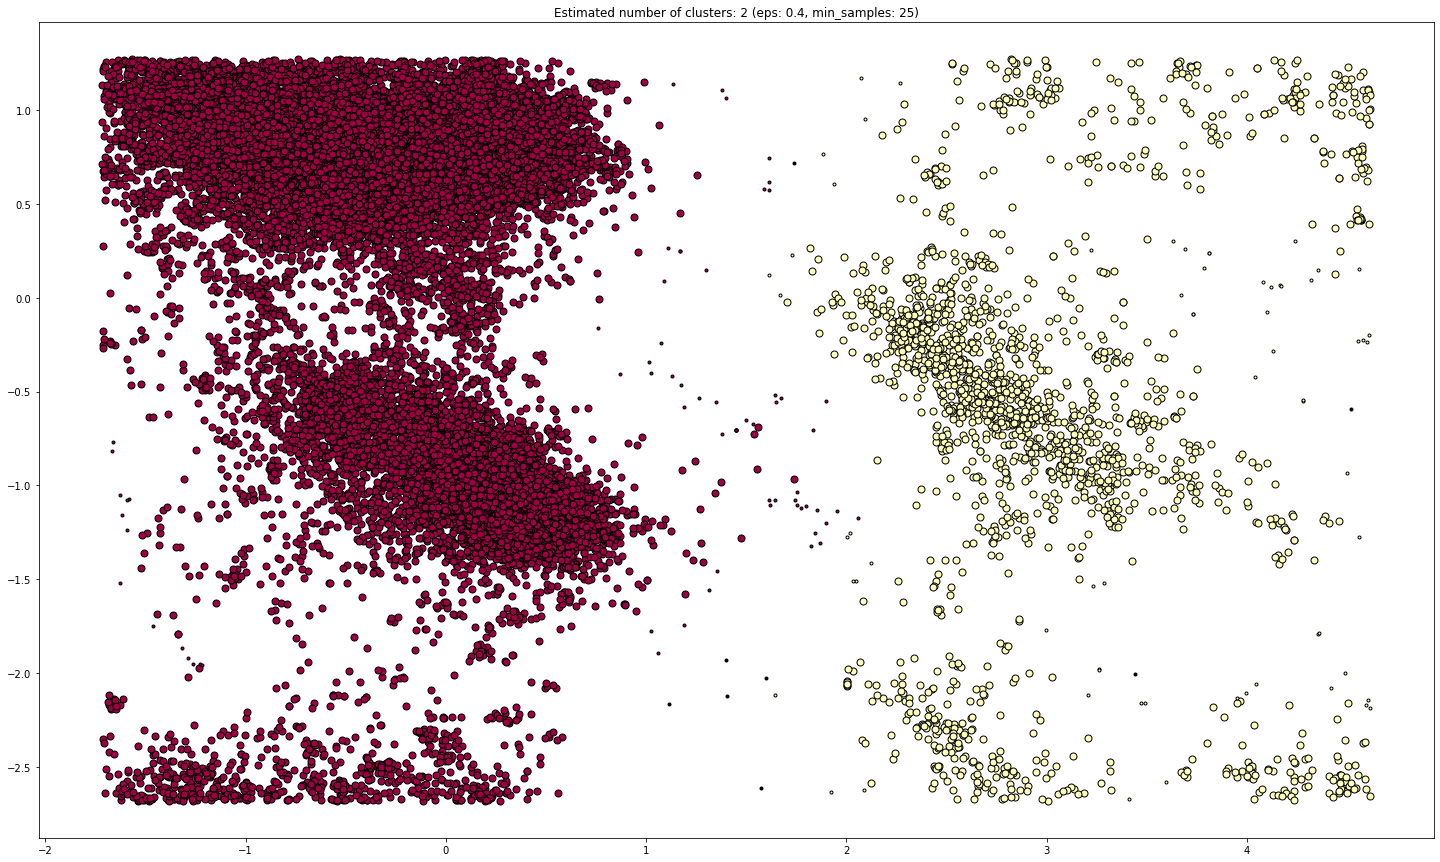

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=25).fit(arr_all) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.2, min_samples=20)
Estimated number of clusters: 10
Estimated number of noise points: 304


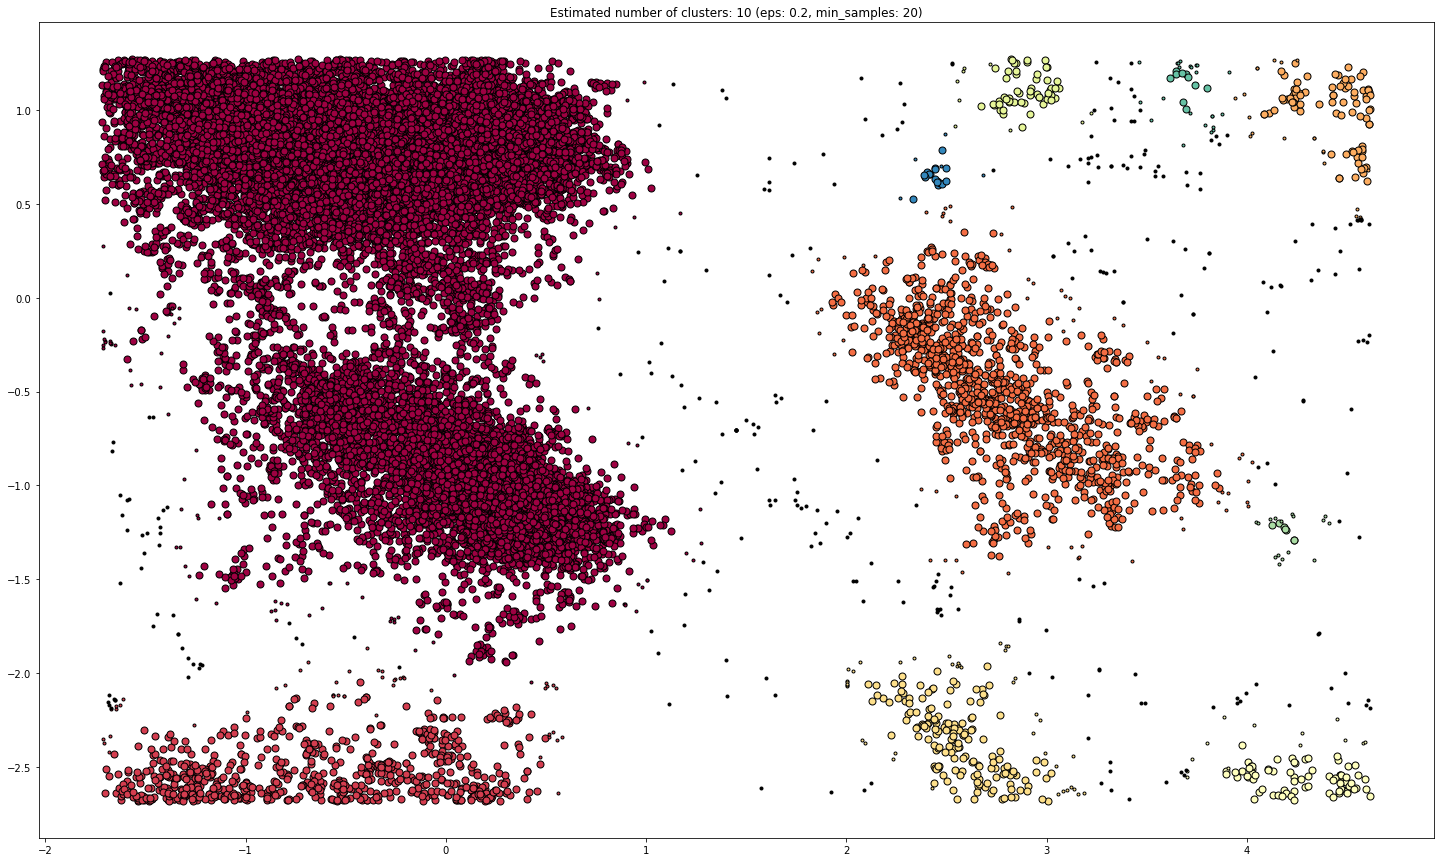

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.2, min_samples=20).fit(arr_all) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.18, min_samples=40)
Estimated number of clusters: 5
Estimated number of noise points: 987


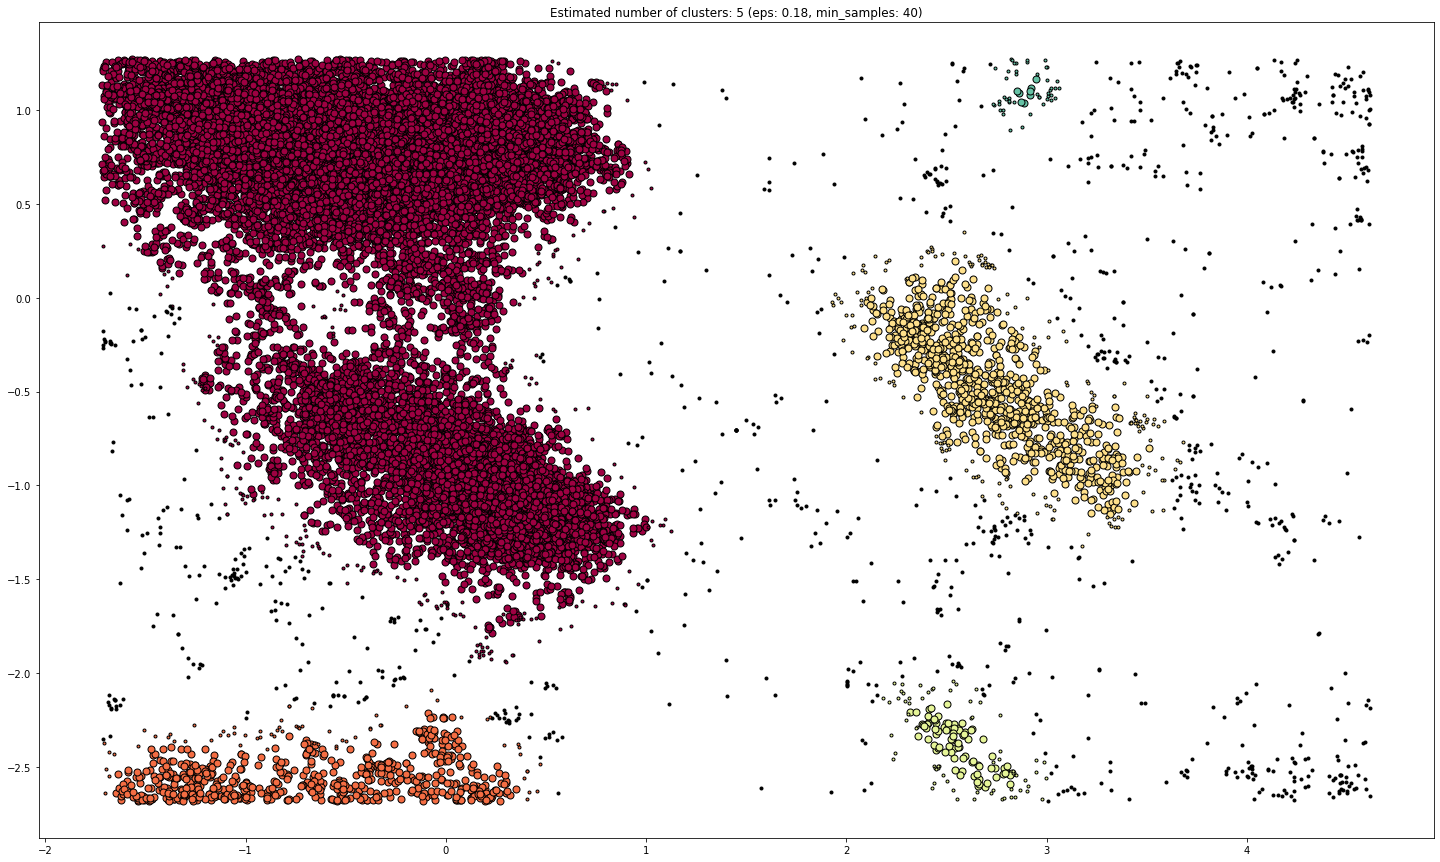

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.18, min_samples=40).fit(arr_all) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.2f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

#B


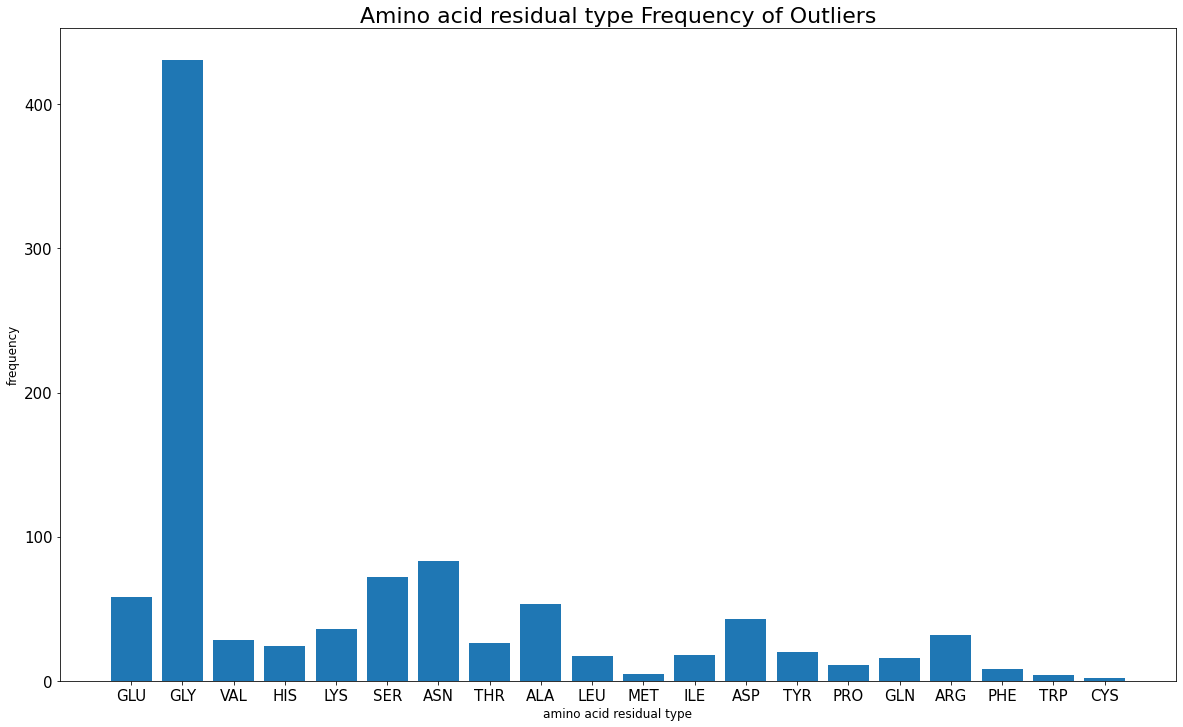

In [ ]:
# Count outlier, protein when eps=0.18, min_samples=40
residue_name = []

for i in range(len(arr_all)):
  if labels[i] == -1 :
   residue_name.append(data_all["residue name"][i])

from collections import Counter
residue_count = Counter(residue_name)

# Plot bar chart from dictionary
names = list(residue_count .keys())
values = list(residue_count .values())


plt.figure(figsize=(20, 12))
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel("amino acid residual type",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.title('Amino acid residual type Frequency of Outliers', fontsize=22)
plt.bar(range(len(residue_count)), values, tick_label=names)
plt.show()



DBSCAN(eps=0.16, min_samples=95)
Estimated number of clusters: 4
Estimated number of noise points: 2373


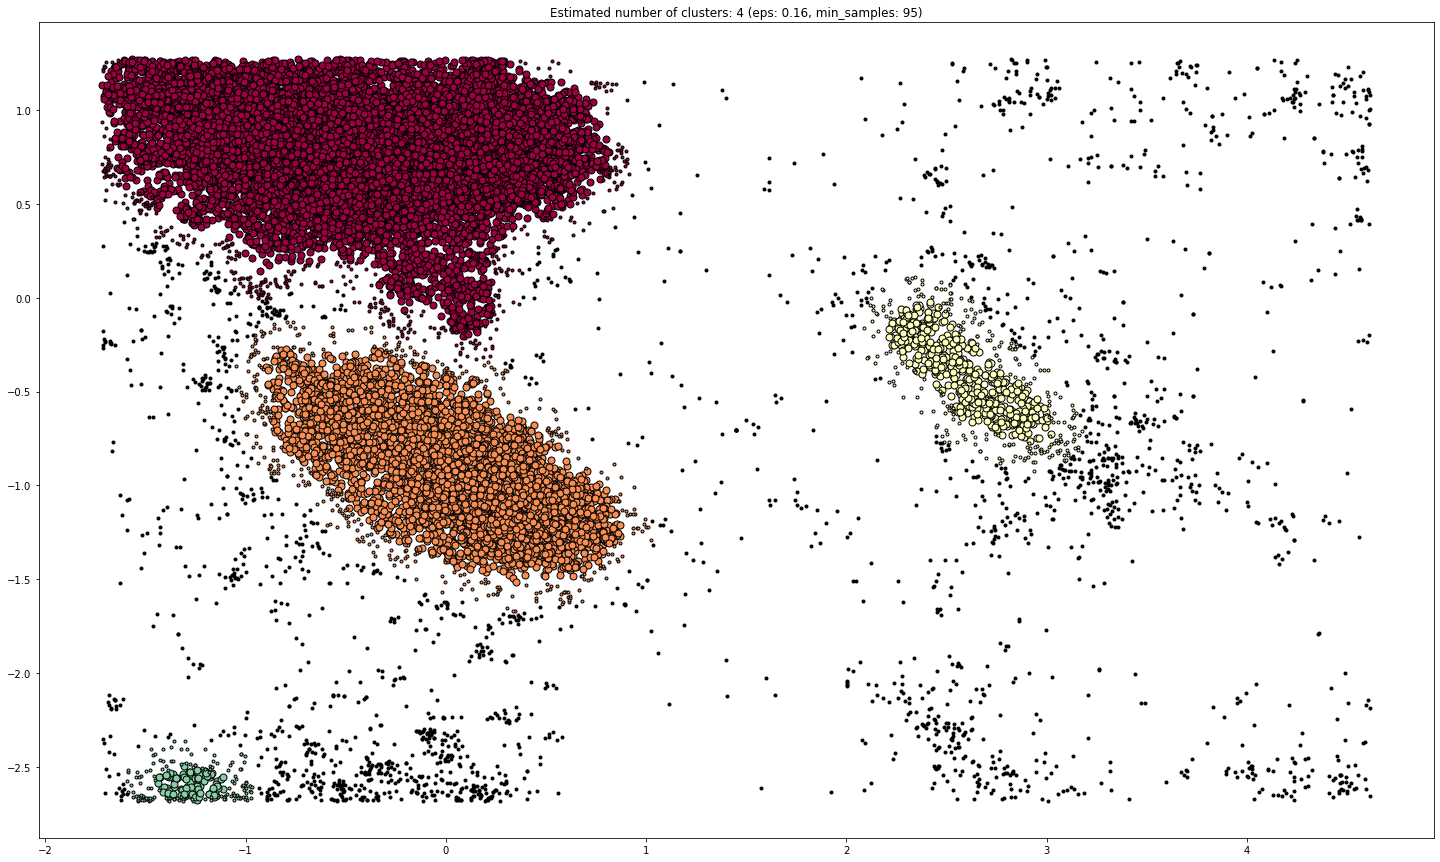

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.16, min_samples=95).fit(arr_all) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_all[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_all[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.2f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

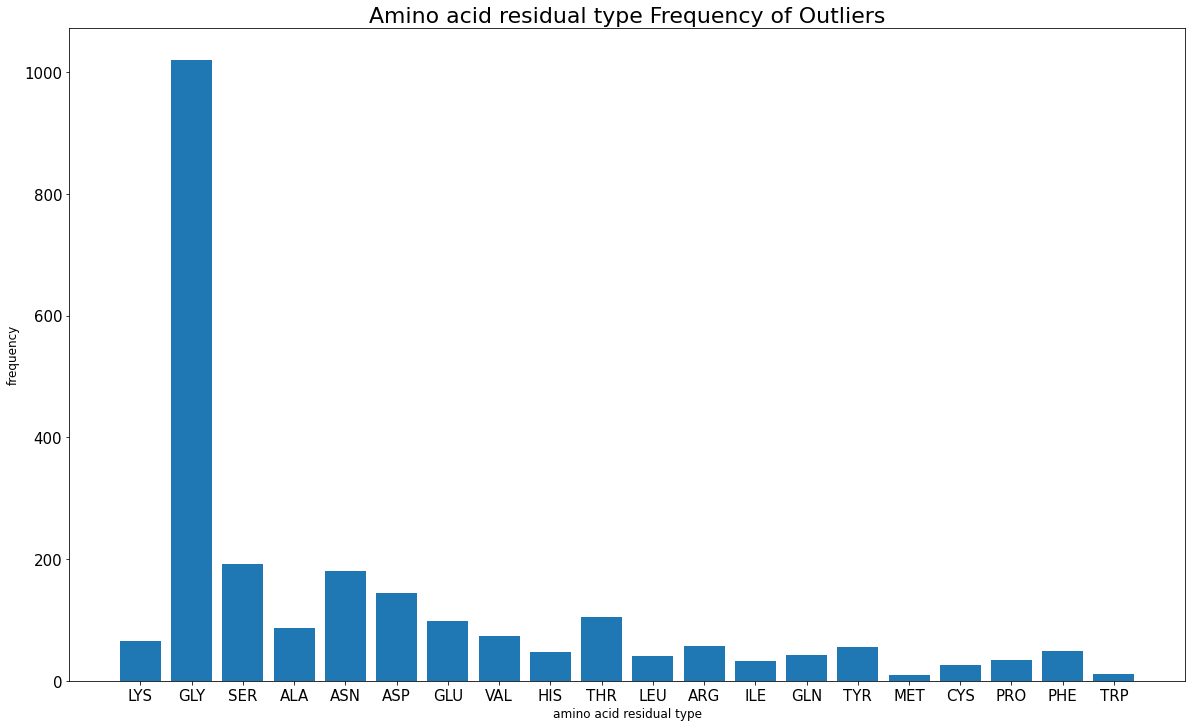

In [ ]:
# Count outlier, protein when eps=0.18, min_samples=40
residue_name = []

for i in range(len(arr_all)):
  if labels[i] == -1 :
   residue_name.append(data_all["residue name"][i])

from collections import Counter
residue_count = Counter(residue_name)

# Plot bar chart from dictionary
names = list(residue_count .keys())
values = list(residue_count .values())


plt.figure(figsize=(20, 12))
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel("amino acid residual type",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.title('Amino acid residual type Frequency of Outliers', fontsize=22)
plt.bar(range(len(residue_count)), values, tick_label=names)
plt.show()


#C
Compare the clusters found by DBSCAN with those found using K-means.

Using DBSCAN, we can not only make clusters but also identify outlier. In this sense, DBSCAN could provide better result. However, lots of repeatation of experiments are required to find proper epsilon and minpts. Moreover, picking a starting point is chosen randomly, the result might vary depends on the point and we need to check stability of the clusters by comparing multiple results. 
Even though DBSCAN has cons but it outperforms K-means because there is no need to say how many clusters at the beginning and it can get rid of noise.
In general, K-means works well with spherical dataset and DBSCAN performs well with arbitrarily-shaped data set. 

We also notice how the K-means method is very sensitive to the number of clusters as input, while in DBSCAN there's no input needed. We also observed how the two methods differed in dealing with large data sets. Since K-means uses a more distinct way of laying down intersections between clusters we can trust it more in dealing with large data sets compared to DBSCAN. The same could be said vice versa about the DBSCAN. A more noisy data set should be more useful with it. 



#D

As shown on the graphs above, the clusters found using DBSCAN do not robust to small changes neither the minimum number of samples in the neighborhood for a point to be considered as a core point nor the choice of the maximum distance between two samples belonging to the same neighborhood. It is an experimental result by changing the minimum number of samples from 10 to 50, and the eps from 0.18 to 0.4. The two large groups on the left should be separated into separate clusters, and it was particularly difficult to separate them due to lots of the noise point near the boundary. This is the main reason for showing a completely different clustering pattern even with small changes of parameters.
Due to the principle of the DBSCAN Algorithm itself, when clustering, even with small changes on parameters, outliers can be considered as border points or the reverse is also possible.

#Task 4

The data file can be stratified by amino acid residue type.

a. 	Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3).

b. 	Now use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters.
Remember that when doing clustering using DBSCAN for a) and b) here, the parameters might have to be adjusted from those used in previous questions.


In [ ]:
# Stratified by amino acid residu type PRO, GLY
data_PRO = data_all.loc[data_all["residue name"] == 'PRO']
data_GLY = data_all.loc[data_all["residue name"] == 'GLY']

x_PRO = data_PRO["phi"]
y_PRO = data_PRO["psi"]

#Covert x and y to 2D array 
arr_PRO = np.array(data_PRO[['phi' ,'psi']])
display(arr_PRO)

arr_GLY = np.array(data_GLY[['phi' ,'psi']])
display(arr_GLY)

#arr_PRO = np.array(arr_PRO)
arr_PRO = StandardScaler().fit_transform(arr_PRO)
arr_GLY = StandardScaler().fit_transform(arr_GLY)



array([[-44.28321 , 136.002076],
       [-49.944645, -25.888991],
       [-76.452014,  97.745207],
       ...,
       [-59.61214 , 160.048387],
       [-48.679835, 135.208297],
       [-61.621274, -41.69496 ]])

array([[  93.478288,  -26.252796],
       [  65.608117,   55.368614],
       [  72.426939,    7.659478],
       ...,
       [-169.931921, -165.965587],
       [  78.873564,    3.599175],
       [-147.749557,  155.223562]])

#a

DBSCAN(eps=0.18, min_samples=40)
Estimated number of clusters: 2
Estimated number of noise points: 375


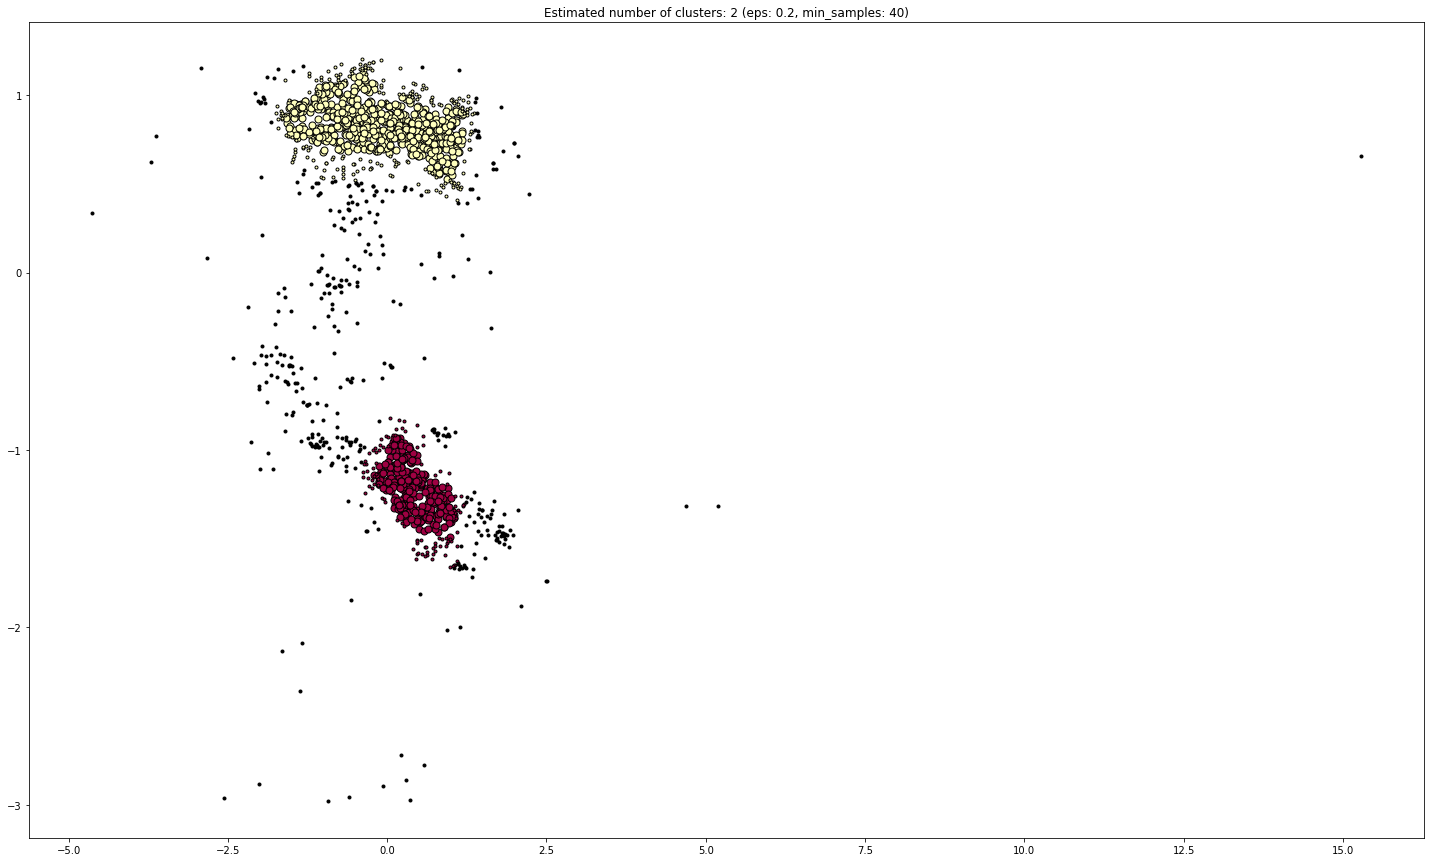

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.18, min_samples=40).fit(arr_PRO) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.4, min_samples=40)
Estimated number of clusters: 2
Estimated number of noise points: 60


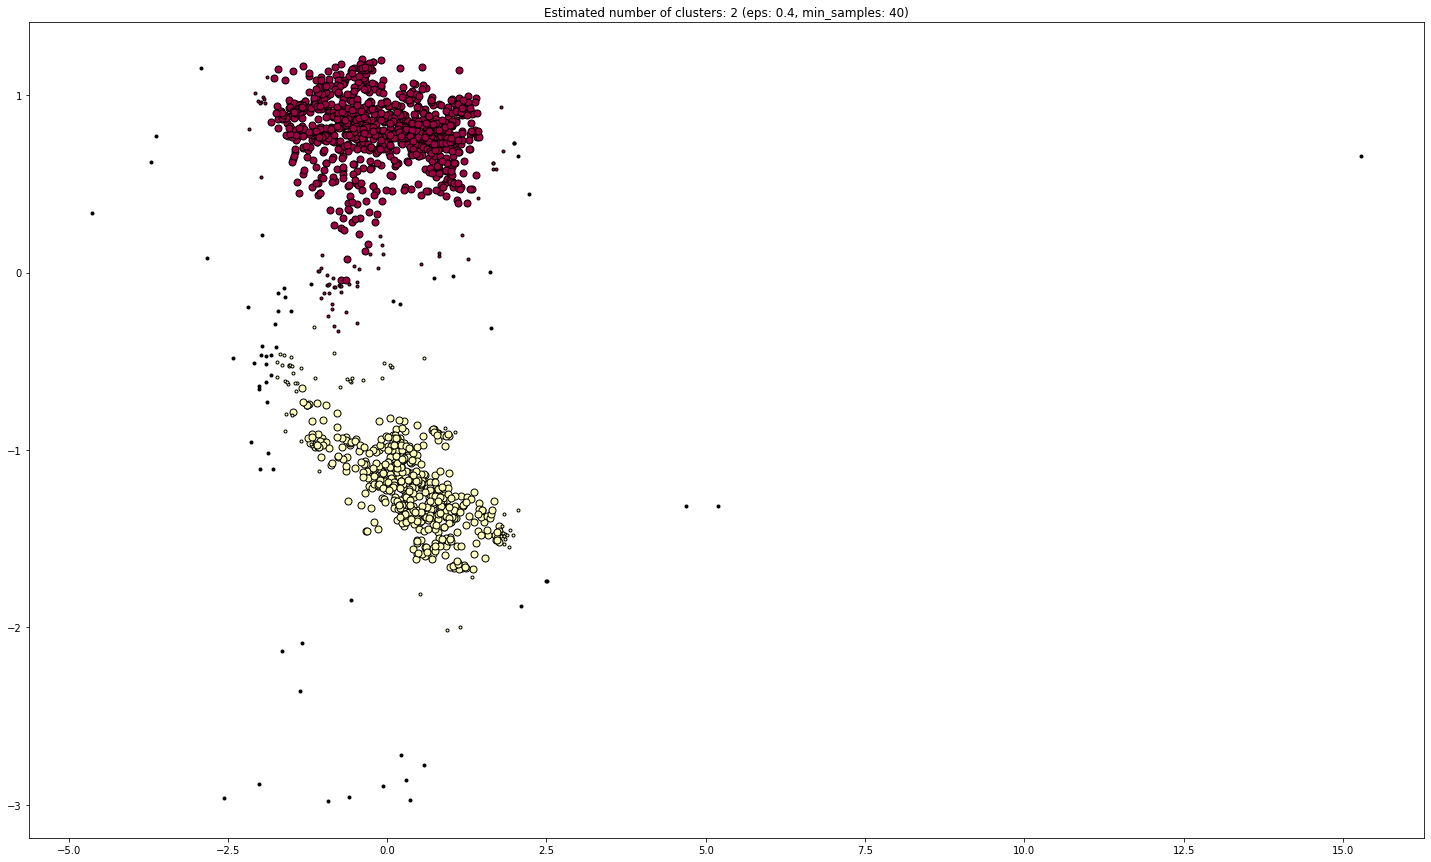

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=40).fit(arr_PRO) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_ + ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.4, min_samples=35)
Estimated number of clusters: 2
Estimated number of noise points: 39


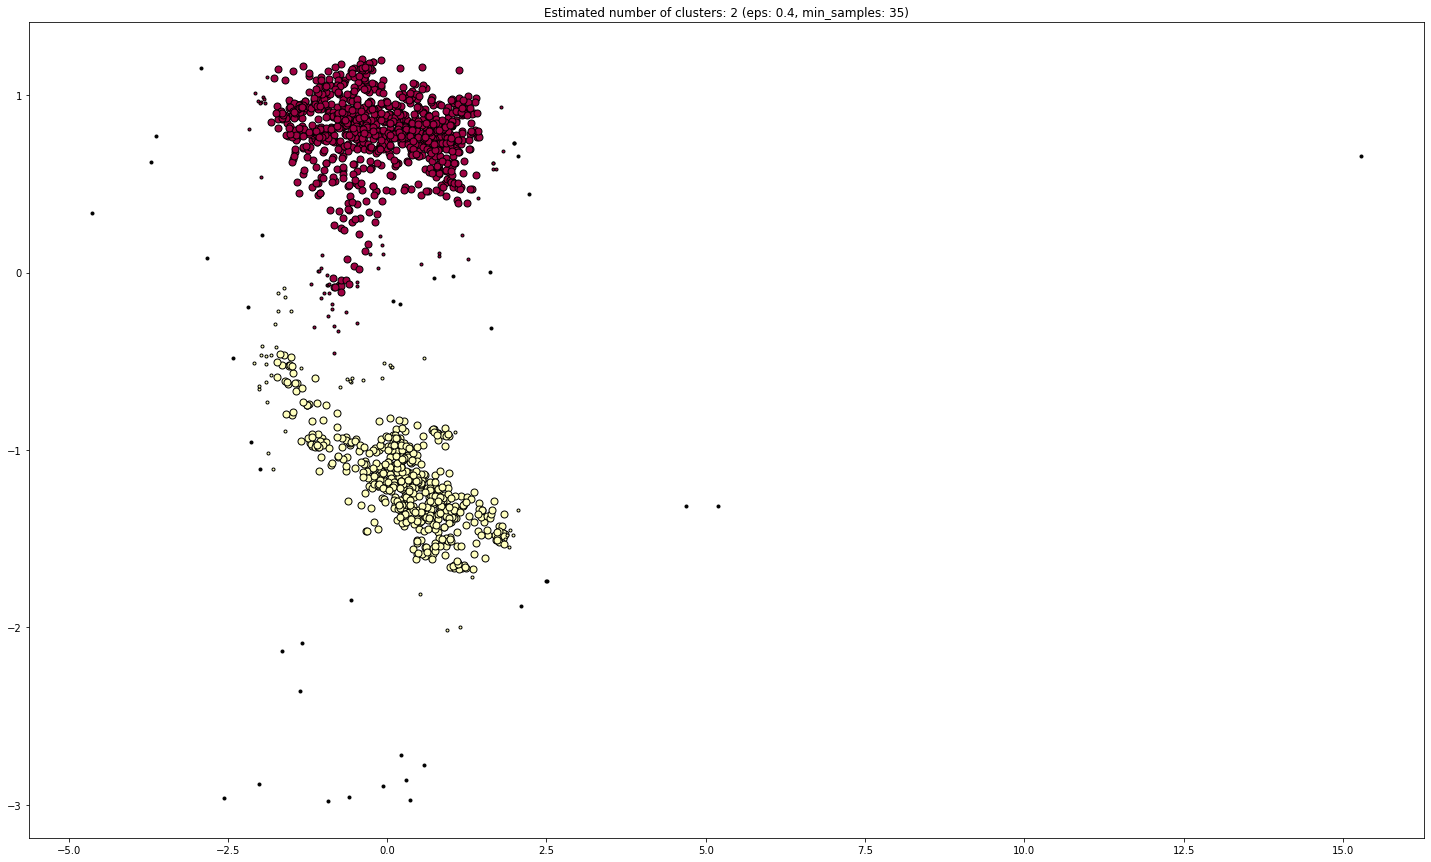

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.4, min_samples=35).fit(arr_PRO) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.1f' % db.eps + ', min_samples: %d)' % db.min_samples )
plt.show()

#b

DBSCAN(eps=0.18, min_samples=40)
Estimated number of clusters: 8
Estimated number of noise points: 262


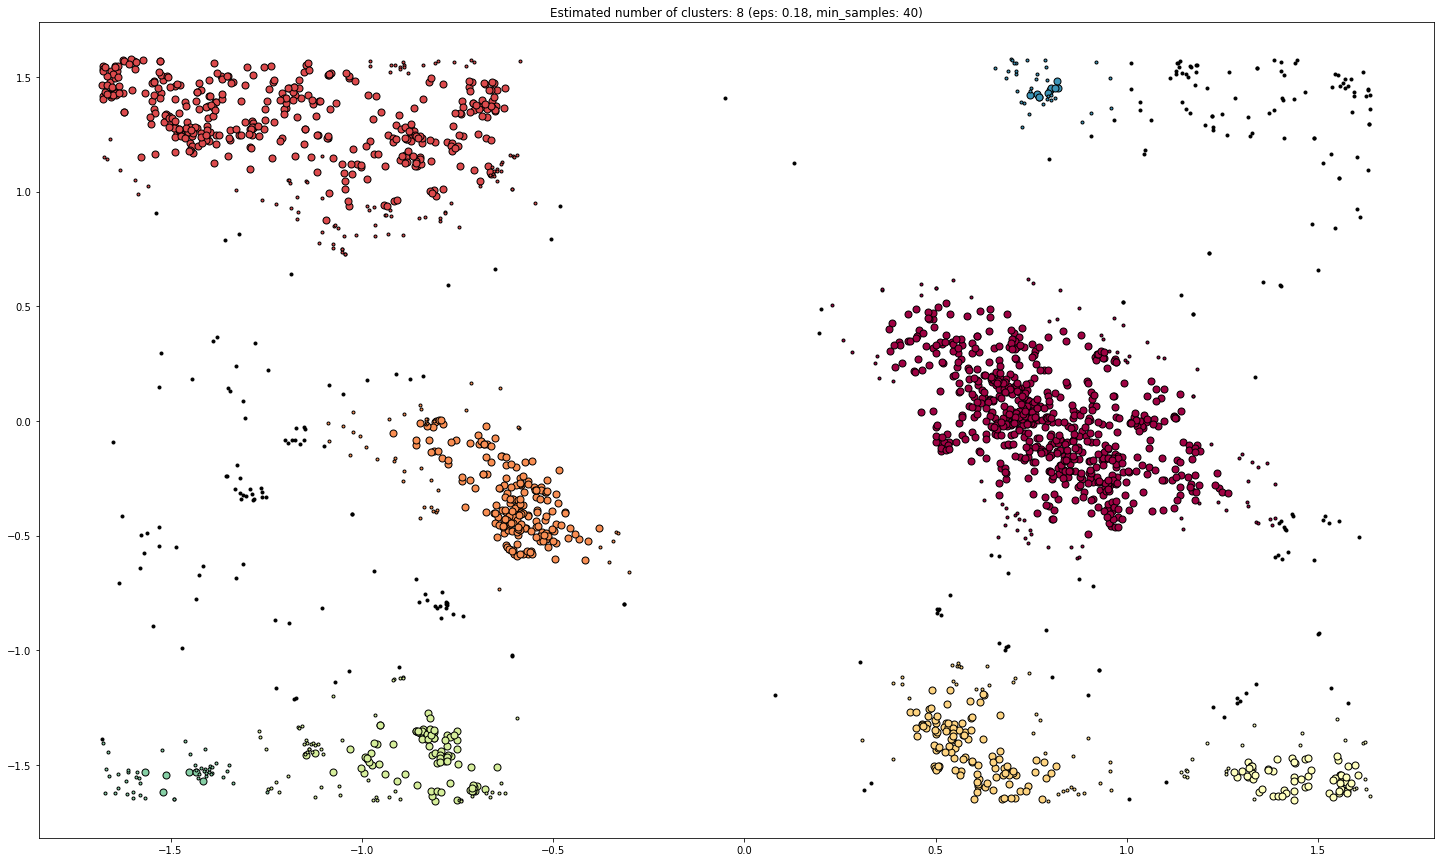

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.18, min_samples=40).fit(arr_GLY) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_GLY[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_GLY[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.2f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.3, min_samples=30)
Estimated number of clusters: 5
Estimated number of noise points: 27


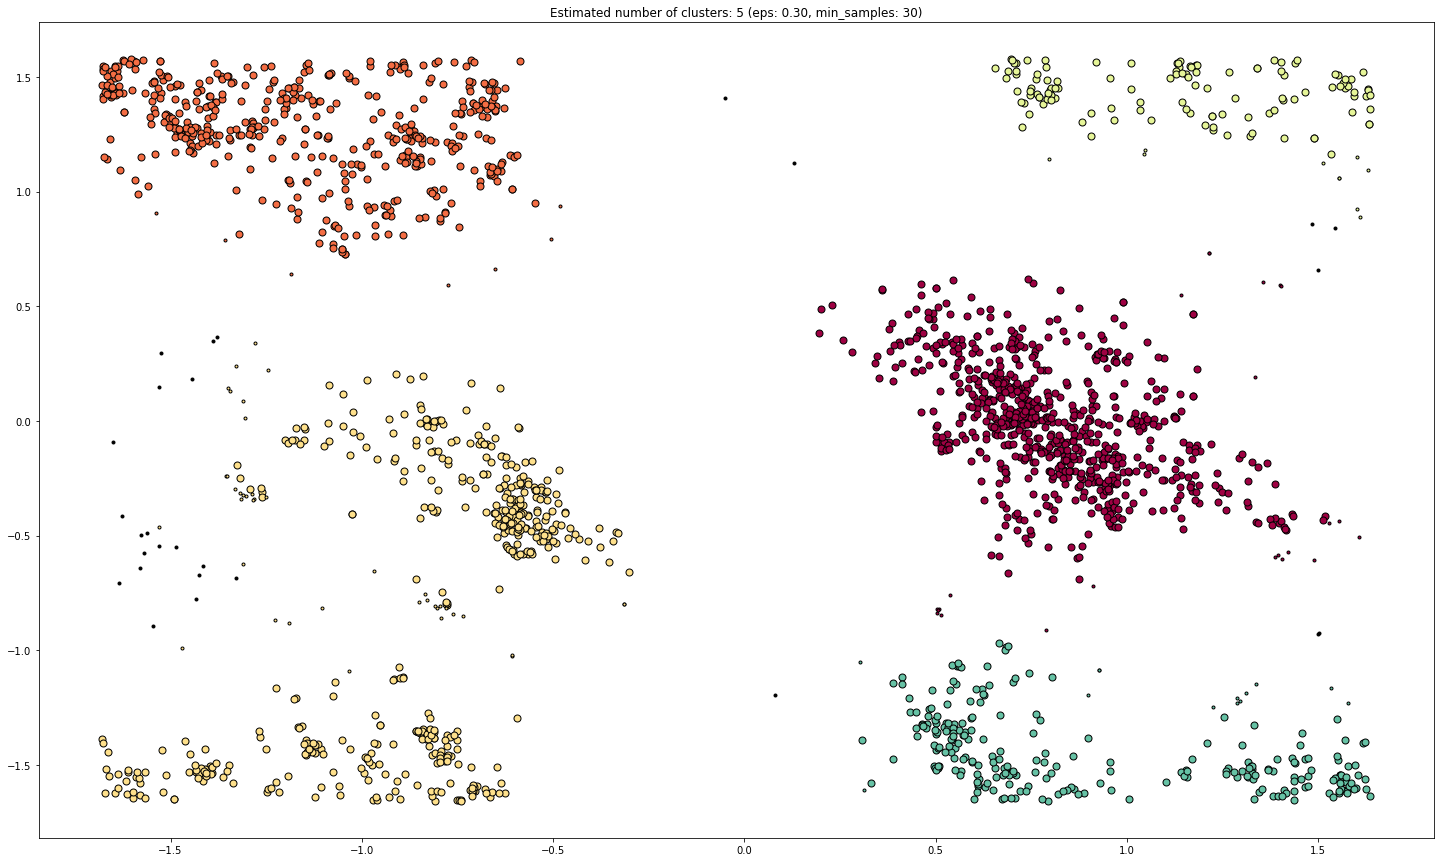

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.3, min_samples=30).fit(arr_GLY) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_GLY[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_GLY[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.2f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

DBSCAN(eps=0.3, min_samples=35)
Estimated number of clusters: 6
Estimated number of noise points: 39


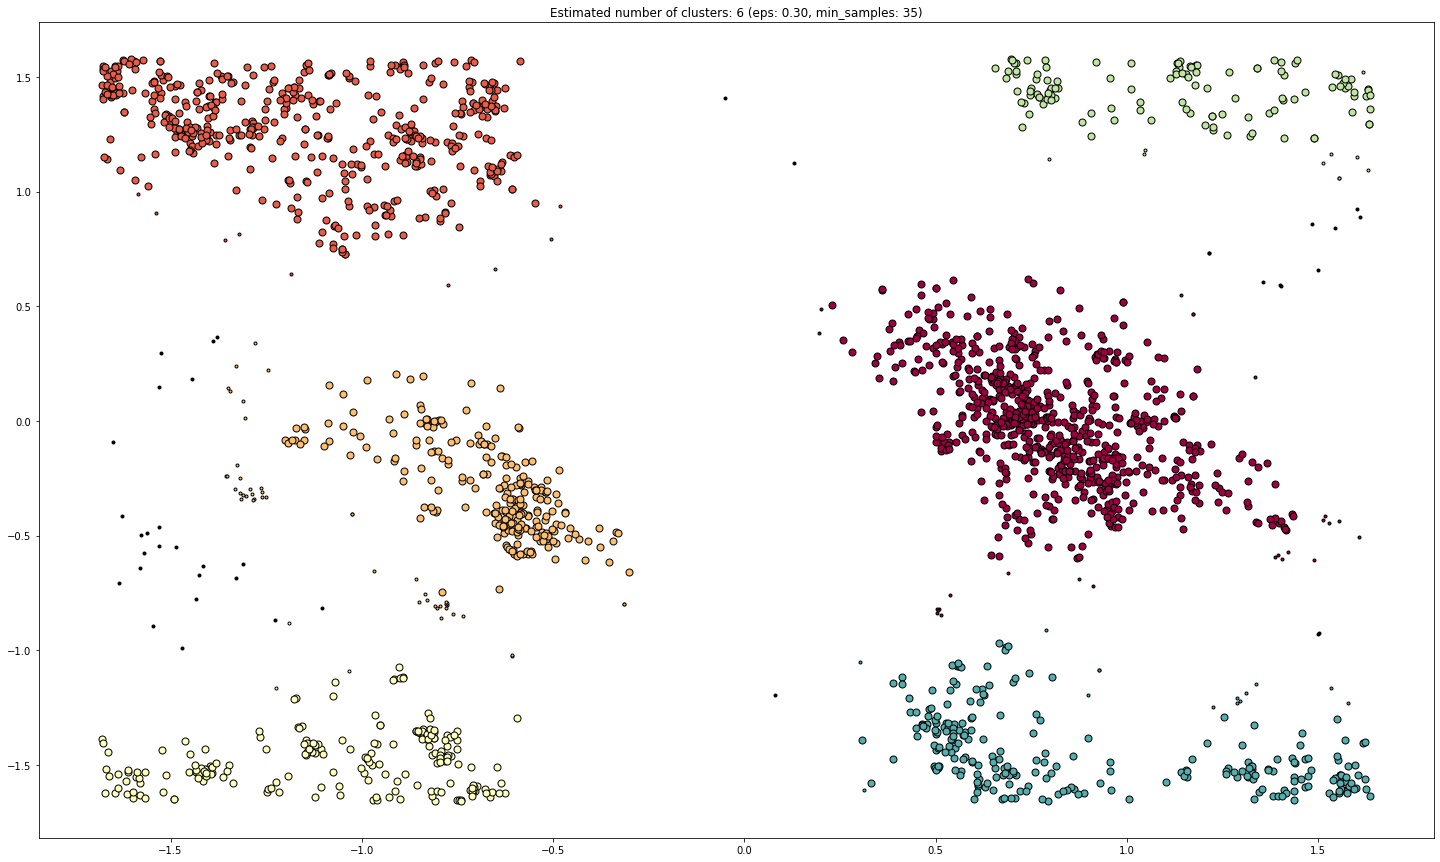

In [ ]:
# Compute DBSCAN 
db = DBSCAN(eps=0.3, min_samples=35).fit(arr_GLY) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    
plt.figure(figsize=(25, 15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr_GLY[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = arr_GLY[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_+ ' (eps: %.2f' % db.eps + ', min_samples: %d)' % db.min_samples)
plt.show()

From the bar chart, GLY has much more outlier which means that it's hard to make cluster than PRO or general clusters as shown in graphs above.

